In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt
from sqlalchemy import create_engine, inspect

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# Create a connection to the database
database_path = "Resources/hawaii.sqlite"
connection_str = f"sqlite:///{database_path}"
print(connection_str)

engine = create_engine(connection_str)

sqlite:///Resources/hawaii.sqlite


In [5]:
# create the inspector and connect to the engine
inspector_gadget = inspect(engine)

tables = inspector_gadget.get_table_names()
for table in tables:
    print(table)
    
    # get all columns in table
    columns = inspector_gadget.get_columns(table)
    for column in columns:
        print(column)
    print()

measurement
{'name': 'id', 'type': INTEGER(), 'nullable': False, 'default': None, 'autoincrement': 'auto', 'primary_key': 1}
{'name': 'station', 'type': TEXT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'date', 'type': TEXT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'prcp', 'type': FLOAT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'tobs', 'type': FLOAT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}

station
{'name': 'id', 'type': INTEGER(), 'nullable': False, 'default': None, 'autoincrement': 'auto', 'primary_key': 1}
{'name': 'station', 'type': TEXT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'name', 'type': TEXT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'latitude', 'type': FLOAT(), 'nullable': True, 'default': None, 'autoi

In [ ]:
# reflect an existing database into a new model

# reflect the tables


In [ ]:
# View all of the classes that automap found


In [ ]:
# Save references to each table


In [ ]:
# Create our session (link) from Python to the DB


# Exploratory Precipitation Analysis

In [6]:
# Find the most recent date in the data set.
query = """SELECT MAX(date)
            FROM measurement
        """
engine.execute(query).fetchall()

[('2017-08-23',)]

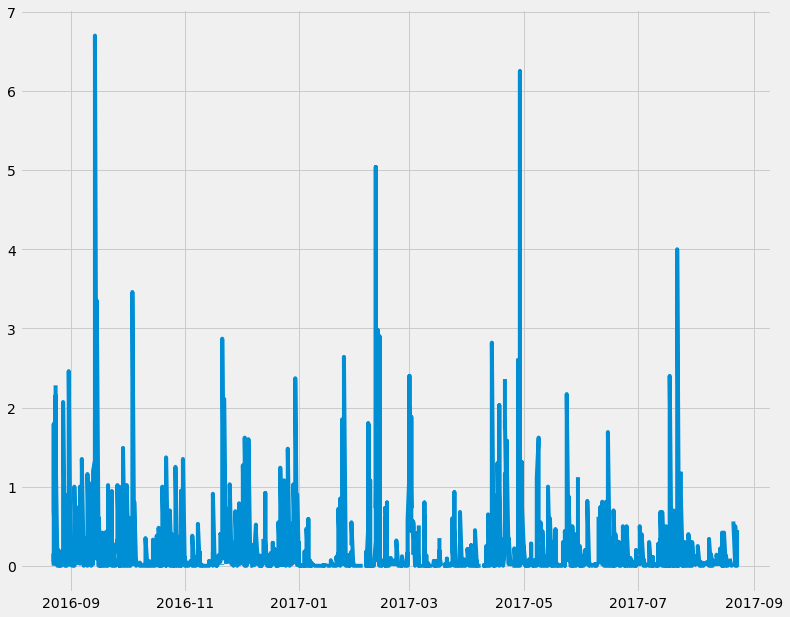

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
query = """
            SELECT
                prcp,
                date
            FROM
                measurement
            WHERE
                date >= '2016-08-23'
            ORDER BY 
                date asc
        """
pd.read_sql(query, engine)
prcpdf = pd.read_sql(query, engine)
# Calculate the date one year from the last date in data set.


# Perform a query to retrieve the data and precipitation scores


# Save the query results as a Pandas DataFrame and set the index to the date column


# Sort the dataframe by date
prcpdf["date"] = pd.to_datetime(prcpdf["date"])

# Use Pandas Plotting with Matplotlib to plot the data
plt.figure(figsize=(12,10))
plt.plot(prcpdf["date"], prcpdf.prcp)
plt.show()



In [12]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prcpdf.info()
prcpdf.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2230 entries, 0 to 2229
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   prcp    2021 non-null   float64       
 1   date    2230 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 35.0 KB


,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [14]:
# Design a query to calculate the total number stations in the dataset
query = """
            SELECT
                count()
            FROM
                station
        """
engine.execute(query).fetchall()

[(9,)]

In [19]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
query = """
            SELECT
                m.station,
                count(m.id) as rows
            FROM
                station s
                JOIN measurement m on s.station = m.station
            GROUP BY
                s.station
            ORDER BY
                rows desc
        
        """
pd.read_sql(query, engine)
rowsdf = pd.read_sql(query, engine)
rowsdf

,station,rows
0,USC00519281,2772
1,USC00519397,2724
2,USC00513117,2709
3,USC00519523,2669
4,USC00516128,2612
5,USC00514830,2202
6,USC00511918,1979
7,USC00517948,1372
8,USC00518838,511


In [21]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
query = """
        SELECT 
            MAX(tobs),
            MIN(tobs),
            AVG(tobs)
        FROM 
            measurement
        WHERE
            station = 'USC00519281' 
        """
pd.read_sql(query, engine)

,MAX(tobs),MIN(tobs),AVG(tobs)
0,85.0,54.0,71.663781


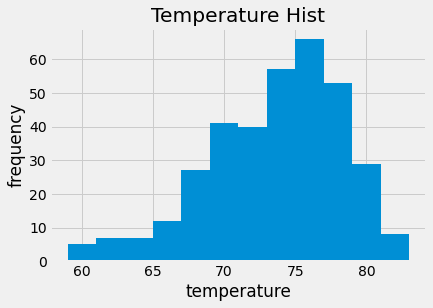

In [27]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
query = """
            SELECT
                tobs,
                date
            FROM
                measurement
            WHERE
                date >= '2016-08-23' AND
                station = 'USC00519281' 
            ORDER BY 
                date asc
        """
pd.read_sql(query, engine)
tempdf = pd.read_sql(query, engine)

plt.hist(tempdf.tobs, bins=12)
plt.xlabel("temperature")
plt.ylabel("frequency")
plt.title("Temperature Hist")
plt.show()

# Close session

In [29]:
# Close Session
engine.dispose()